In [42]:
import pandas as pd
from IPython.display import display

df = pd.read_csv("Elektricke energie_bilance_final.csv", index_col=0)
df = df.rename(
    columns={
        "year": "rok",
        "Vyroba_e": "Celková",
        "p_elektrarny": "Uhelné",
        "vod_elektrarny": "Vodní",
        "vet_elektrarny": "Větrné",
        "sol_elektrarny": "Solární",
        "J_elektrarny": "Jaderné",
    }
)
display(df)

,rok,Celková,Uhelné,Vodní,Větrné,Solární,Jaderné
id,,,,,,,
1,2010,85903,53574,3380,335,616,27998
2,2011,87477,53951,2664,397,2182,28283
3,2012,87418,51669,2860,416,2149,30324
4,2013,86913,50015,3639,481,2033,30745
5,2014,86148,50262,2961,477,2123,30325
6,2015,83892,51143,3071,573,2264,26841
7,2016,83309,53375,3202,497,2131,24104
8,2017,87050,52886,3040,591,2193,28340
9,2018,88032,52464,2679,609,2359,29921


In [43]:
file = "Instalovany_vykon.xlsx"
xls = pd.ExcelFile(file)
xls.sheet_names

['List1', 'List2', 'List3']

In [44]:
df1 = xls.parse("List1")
df1 = df1.rename(columns={"Unnamed: 0": "Rok"})
df1.head(10)

,Rok,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Instalovaný výkon [MWe],2.194091e+04,2.187765e+04,2.200698e+04,2.229361e+04,2.230255e+04,2.201428e+04,2.137846e+04,2.087761e+04,2.080616e+04
1,Jaderné (JE),4.290000e+03,4.290000e+03,4.290000e+03,4.290000e+03,4.290000e+03,4.290000e+03,4.290000e+03,4.290000e+03,4.290000e+03
2,Parní (PE),1.083670e+04,1.074185e+04,1.084998e+04,1.107552e+04,1.107544e+04,1.072987e+04,1.005885e+04,9.527695e+03,9.415897e+03
3,Paroplynové (PPE),1.363000e+03,1.363315e+03,1.363500e+03,1.363500e+03,1.363500e+03,1.363500e+03,1.363500e+03,1.363500e+03,1.363500e+03
4,Plynové a spalovací (PSE),8.336690e+02,8.555630e+02,8.739920e+02,8.959870e+02,9.109098e+02,9.377040e+02,9.617493e+02,9.831518e+02,1.012218e+03
5,Vodní (VE),1.091049e+03,1.094980e+03,1.100191e+03,1.112261e+03,1.112520e+03,1.113208e+03,1.113913e+03,1.114631e+03,1.113576e+03
6,Přečerpávací (PVE),1.171500e+03,1.171500e+03,1.171500e+03,1.171500e+03,1.171500e+03,1.171500e+03,1.171500e+03,1.171500e+03,1.171500e+03
7,Větrné (VTE),2.781909e+02,2.821859e+02,2.821549e+02,3.082074e+02,3.167074e+02,3.394244e+02,3.394244e+02,3.394244e+02,3.390949e+02
8,Fotovoltaické (FVE),2.076794e+03,2.078250e+03,2.075664e+03,2.076626e+03,2.061971e+03,2.069075e+03,2.079521e+03,2.087705e+03,2.100377e+03
9,Výroba elektřiny brutto [MWh],8.406143e+07,8.180175e+07,8.134669e+07,8.501965e+07,8.583606e+07,8.487876e+07,7.938390e+07,8.293100e+07,8.238005e+07


In [45]:
df_interpol = df1[0:9]
df_interpol = df_interpol.set_index("Rok")
df_interpol

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Rok,,,,,,,,,
Instalovaný výkon [MWe],21940.90792,21877.64677,22006.97684,22293.60552,22302.55024,22014.28007,21378.45512,20877.60744,20806.16255
Jaderné (JE),4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000
Parní (PE),10836.70440,10741.85200,10849.97500,11075.52400,11075.44200,10729.86900,10058.84800,9527.69500,9415.89700
Paroplynové (PPE),1363.00000,1363.31500,1363.50000,1363.50000,1363.50000,1363.50000,1363.50000,1363.50000,1363.50000
Plynové a spalovací (PSE),833.66900,855.56300,873.99200,895.98700,910.90980,937.70400,961.74930,983.15180,1012.21800
Vodní (VE),1091.04920,1094.98050,1100.19060,1112.26110,1112.51960,1113.20809,1113.91253,1114.63113,1113.57568
Přečerpávací (PVE),1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000
Větrné (VTE),278.19090,282.18590,282.15490,308.20740,316.70740,339.42440,339.42440,339.42440,339.09490
Fotovoltaické (FVE),2076.79442,2078.25037,2075.66434,2076.62602,2061.97144,2069.07458,2079.52089,2087.70511,2100.37697


In [46]:
df_interpol.index.values.tolist()
# ["Paroplynové (PPE)"]  # + df_interpol["Plynové a spalovací (PSE)"]

['Instalovaný výkon [MWe]',
 'Jaderné (JE)',
 'Parní (PE)',
 'Paroplynové (PPE)',
 'Plynové a spalovací (PSE)',
 'Vodní (VE)',
 'Přečerpávací (PVE)',
 'Větrné (VTE)',
 'Fotovoltaické (FVE)']

In [47]:
df_interpol.loc["Plynové"] = (
    df_interpol.loc["Paroplynové (PPE)"] + df_interpol.loc["Plynové a spalovací (PSE)"]
)
df_interpol

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Rok,,,,,,,,,
Instalovaný výkon [MWe],21940.90792,21877.64677,22006.97684,22293.60552,22302.55024,22014.28007,21378.45512,20877.60744,20806.16255
Jaderné (JE),4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000
Parní (PE),10836.70440,10741.85200,10849.97500,11075.52400,11075.44200,10729.86900,10058.84800,9527.69500,9415.89700
Paroplynové (PPE),1363.00000,1363.31500,1363.50000,1363.50000,1363.50000,1363.50000,1363.50000,1363.50000,1363.50000
Plynové a spalovací (PSE),833.66900,855.56300,873.99200,895.98700,910.90980,937.70400,961.74930,983.15180,1012.21800
Vodní (VE),1091.04920,1094.98050,1100.19060,1112.26110,1112.51960,1113.20809,1113.91253,1114.63113,1113.57568
Přečerpávací (PVE),1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000
Větrné (VTE),278.19090,282.18590,282.15490,308.20740,316.70740,339.42440,339.42440,339.42440,339.09490
Fotovoltaické (FVE),2076.79442,2078.25037,2075.66434,2076.62602,2061.97144,2069.07458,2079.52089,2087.70511,2100.37697


In [48]:
df_interpol = df_interpol.drop(
    index=["Instalovaný výkon [MWe]", "Paroplynové (PPE)", "Plynové a spalovací (PSE)"]
)
df_interpol

,2014,2015,2016,2017,2018,2019,2020,2021,2022
Rok,,,,,,,,,
Jaderné (JE),4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000
Parní (PE),10836.70440,10741.85200,10849.97500,11075.52400,11075.44200,10729.86900,10058.84800,9527.69500,9415.89700
Vodní (VE),1091.04920,1094.98050,1100.19060,1112.26110,1112.51960,1113.20809,1113.91253,1114.63113,1113.57568
Přečerpávací (PVE),1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000
Větrné (VTE),278.19090,282.18590,282.15490,308.20740,316.70740,339.42440,339.42440,339.42440,339.09490
Fotovoltaické (FVE),2076.79442,2078.25037,2075.66434,2076.62602,2061.97144,2069.07458,2079.52089,2087.70511,2100.37697
Plynové,2196.66900,2218.87800,2237.49200,2259.48700,2274.40980,2301.20400,2325.24930,2346.65180,2375.71800


In [49]:
df_interpol[list(range(2023, 2030))] = float("nan")
df_interpol

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029
Rok,,,,,,,,,,,,,,,,
Jaderné (JE),4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Parní (PE),10836.70440,10741.85200,10849.97500,11075.52400,11075.44200,10729.86900,10058.84800,9527.69500,9415.89700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Vodní (VE),1091.04920,1094.98050,1100.19060,1112.26110,1112.51960,1113.20809,1113.91253,1114.63113,1113.57568,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Přečerpávací (PVE),1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Větrné (VTE),278.19090,282.18590,282.15490,308.20740,316.70740,339.42440,339.42440,339.42440,339.09490,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fotovoltaické (FVE),2076.79442,2078.25037,2075.66434,2076.62602,2061.97144,2069.07458,2079.52089,2087.70511,2100.37697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Plynové,2196.66900,2218.87800,2237.49200,2259.48700,2274.40980,2301.20400,2325.24930,2346.65180,2375.71800,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
df_interpol[2030] = [4290, 5600, 1113.57568, 1171.50000, 700, 6000, 3800]
df_interpol

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
Rok,,,,,,,,,,,,,,,,,
Jaderné (JE),4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4290.00000
Parní (PE),10836.70440,10741.85200,10849.97500,11075.52400,11075.44200,10729.86900,10058.84800,9527.69500,9415.89700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5600.00000
Vodní (VE),1091.04920,1094.98050,1100.19060,1112.26110,1112.51960,1113.20809,1113.91253,1114.63113,1113.57568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1113.57568
Přečerpávací (PVE),1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1171.50000
Větrné (VTE),278.19090,282.18590,282.15490,308.20740,316.70740,339.42440,339.42440,339.42440,339.09490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.00000
Fotovoltaické (FVE),2076.79442,2078.25037,2075.66434,2076.62602,2061.97144,2069.07458,2079.52089,2087.70511,2100.37697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6000.00000
Plynové,2196.66900,2218.87800,2237.49200,2259.48700,2274.40980,2301.20400,2325.24930,2346.65180,2375.71800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3800.00000


In [64]:
df_interpolated = df_interpol.interpolate(method="polynomial", order=2, axis=1)
df_interpolated

,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
Rok,,,,,,,,,,,,,,,,,
Jaderné (JE),4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.00000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.000000,4290.00000
Parní (PE),10836.70440,10741.85200,10849.97500,11075.52400,11075.44200,10729.86900,10058.84800,9527.69500,9415.89700,9285.924263,9056.804559,8728.537886,8301.124245,7774.563636,7148.856059,6424.001513,5600.00000
Vodní (VE),1091.04920,1094.98050,1100.19060,1112.26110,1112.51960,1113.20809,1113.91253,1114.63113,1113.57568,1112.480340,1111.697954,1111.228523,1111.072046,1111.228523,1111.697954,1112.480340,1113.57568
Přečerpávací (PVE),1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.50000,1171.500000,1171.500000,1171.500000,1171.500000,1171.500000,1171.500000,1171.500000,1171.50000
Větrné (VTE),278.19090,282.18590,282.15490,308.20740,316.70740,339.42440,339.42440,339.42440,339.09490,347.524603,366.435287,395.826953,435.699600,486.053228,546.887837,618.203428,700.00000
Fotovoltaické (FVE),2076.79442,2078.25037,2075.66434,2076.62602,2061.97144,2069.07458,2079.52089,2087.70511,2100.37697,2206.802930,2422.093724,2746.249352,3179.269814,3721.155109,4371.905239,5131.520203,6000.00000
Plynové,2196.66900,2218.87800,2237.49200,2259.48700,2274.40980,2301.20400,2325.24930,2346.65180,2375.71800,2435.090201,2528.366130,2655.545788,2816.629174,3011.616288,3240.507130,3503.301701,3800.00000


<AxesSubplot: >

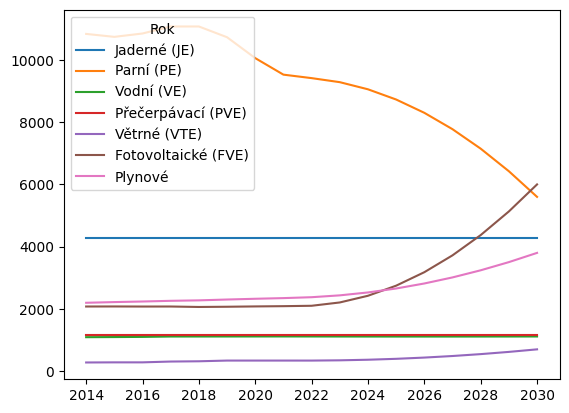

In [65]:
import matplotlib.pyplot as plt

# plt.figsize(12, 9)
df_interpolated.transpose().plot()

In [58]:
df_interpolated.to_csv("Interpolated Energy Mix.csv", index=True)